![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. 

In [2]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We used a few special parameters to correctly parse the csv. As the header is missing, pandas is assigning numbers to the columns.

**This is when the fun starts...**
<br><br><br>

---

### Exercise: Rename the columns

Use the names contained in `col_names` to properly name the columns (and replace the numbers). 

In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

In [4]:
df.columns = col_names

Once everything works, it'll look something like this:

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exercise: Cleaning the data

You'll notice that some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass` (spoiler, it's a `?` question mark):

In [6]:
# Results

In [7]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
df["native-country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

In [10]:
df= df[df.workclass!='?']
df= df[df["native-country"]!='?']
df= df[df.occupation!='?']

In [11]:
df.workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [12]:
df.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df["native-country"].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [14]:
# Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [15]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [16]:
df['income'] = df['income'].astype('category')
df['income'].values

[<=50K, <=50K, <=50K, <=50K, <=50K, ..., <=50K, >50K, <=50K, <=50K, >50K]
Length: 30162
Categories (2, object): [<=50K, >50K]

In [17]:
# Expected result:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=False)

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [18]:
# Expected result:

In [19]:
pd.get_dummies(df['income']).head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [20]:
df = pd.concat([df, pd.get_dummies(df['income'])], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


### Exercise: Plot a **distplot** showing the distribution of `age`.

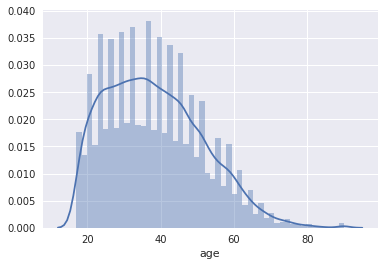

In [21]:
sns.distplot(df.age)

In [22]:
# Expected output

### Exercise: Plot a **boxplot** showing the distribution of `age`.

In [23]:
# Expected output

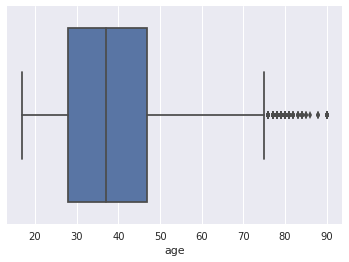

In [24]:
sns.boxplot(df.age)

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

In [25]:
# Expected solution:

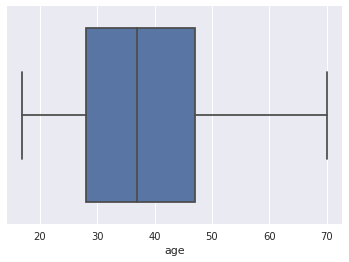

In [26]:
df = df[df["age"]<=70]
sns.boxplot(df.age)

### Exercise: How many people work more than 20 hours per week?

In [27]:
# Expected output

In [28]:
df.loc[df["hours-per-week"]>20].count()

age               27553
workclass         27553
fnlwgt            27553
education         27553
education-num     27553
marital-status    27553
occupation        27553
relationship      27553
race              27553
sex               27553
capital-gain      27553
capital-loss      27553
hours-per-week    27553
native-country    27553
income            27553
<=50K             27553
>50K              27553
dtype: int64

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [29]:
# Expected output


In [67]:
df_total = df["sex"].count()
df_male = df["sex"][df["sex"]=="Male"].count()
df_female = df["sex"][df["sex"]=="Female"].count()
por_female = " Women are {}, and represents {}".format(df_female, df_female/ df_total)
por_male = " Men are {}, and represents {}".format(df_male, df_male/ df_total)
print(por_female + por_male + " Total = {}".format(df_total))

 Women are 9655, and represents 0.3242326549801867 Men are 20123, and represents 0.6757673450198133 Total = 29778


### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

In [31]:
# Expected Result:

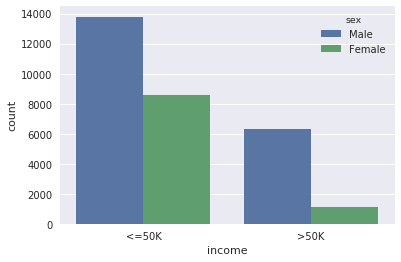

In [71]:
sns.countplot(x="income", hue="sex",  data=df);

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

In [32]:
# Expected result

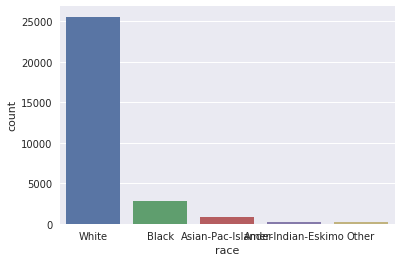

In [74]:
sns.countplot(x="race",  data=df);

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [33]:
# Expected result:

In [79]:
df.groupby('race')['age'].count()

race
Amer-Indian-Eskimo      284
Asian-Pac-Islander      882
Black                  2792
Other                   230
White                 25590
Name: age, dtype: int64

### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

In [34]:
# Expected result:

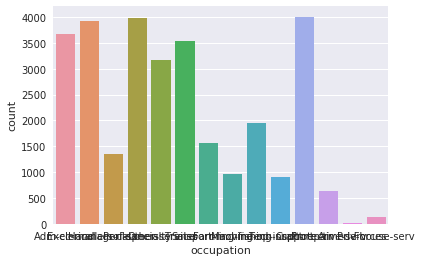

In [80]:
sns.countplot(x="occupation",  data=df);

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [35]:
# Expected output

In [81]:
df.groupby('occupation')['age'].count()

occupation
Adm-clerical         3678
Armed-Forces            9
Craft-repair         4007
Exec-managerial      3929
Farming-fishing       958
Handlers-cleaners    1341
Machine-op-inspct    1956
Other-service        3160
Priv-house-serv       129
Prof-specialty       3983
Protective-serv       630
Sales                3529
Tech-support          909
Transport-moving     1560
Name: age, dtype: int64

### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

In [36]:
# Expected result:

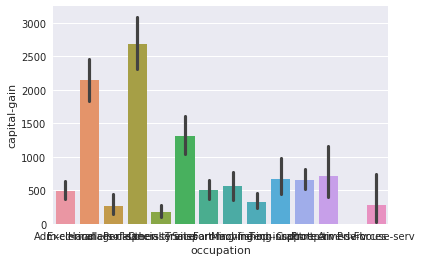

In [93]:
sns.barplot(data=df, x='occupation', y='capital-gain', estimator=np.mean)

### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [37]:
# Expected result

In [92]:
df.groupby('occupation')['capital-gain'].mean()

occupation
Adm-clerical          484.934203
Armed-Forces            0.000000
Craft-repair          652.153731
Exec-managerial      2142.508526
Farming-fishing       559.720251
Handlers-cleaners     258.532438
Machine-op-inspct     323.501022
Other-service         177.340823
Priv-house-serv       284.279070
Prof-specialty       2683.180015
Protective-serv       710.965079
Sales                1315.239161
Tech-support          664.147415
Transport-moving      501.953205
Name: capital-gain, dtype: float64

### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

In [38]:
# Expected output

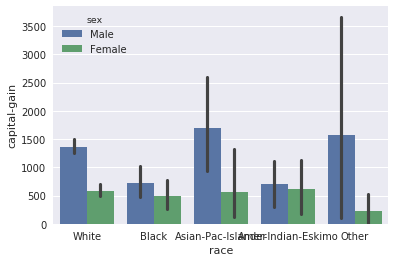

In [96]:
sns.barplot(data=df, x='race', y="capital-gain", hue='sex', estimator=np.mean)

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [39]:
# Expected output

In [98]:
df.groupby(['race',"sex"])['capital-gain'].mean()

race                sex   
Amer-Indian-Eskimo  Female     611.396226
                    Male       696.825843
Asian-Pac-Islander  Female     571.986207
                    Male      1691.790541
Black               Female     485.442682
                    Male       729.656228
Other               Female     223.873563
                    Male      1577.160839
White               Female     588.723571
                    Male      1359.602134
Name: capital-gain, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)